In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
# Assign specific colors for each ppi_type
palette_dict = {
    "quarter": "tab:green",
    "half": "tab:orange",
    "full": "tab:blue"
}

In [3]:
time_data = pd.read_csv("timing_results.csv")
time_data

,dataset,ppi_type,rows,cols,runtime_sec,timestamp
0,subdataset_full_1000rows_10cols,full,1000,10,387.711387,2025-08-28 15:43:44
1,subdataset_half_5000rows_15cols,half,5000,15,1041.270717,2025-08-28 16:01:06
2,subdataset_full_5000rows_15cols,full,5000,15,1352.510945,2025-08-28 16:23:38
3,subdataset_half_1000rows_15cols,half,1000,15,504.377644,2025-08-28 16:32:03
4,subdataset_full_100000rows_5cols,full,100000,5,4344.001491,2025-08-28 17:44:27
...,...,...,...,...,...,...
58,subdataset_quarter_100000rows_15cols,quarter,100000,15,3257.674666,2025-08-30 10:49:03
59,subdataset_quarter_1000000rows_5cols,quarter,1000000,5,3070.184096,2025-08-30 11:40:13
60,subdataset_quarter_1000000rows_15cols,quarter,1000000,15,3280.038977,2025-08-30 12:34:53
61,subdataset_full_50000rows_5cols,full,50000,5,4093.218574,2025-08-30 13:43:06


In [4]:
# add column with ratio of time to number of atoms
time_data["rows_cols_ratio"] = time_data["rows"] / time_data["cols"]
time_data["cols_rows_ratio"] = time_data["cols"] / time_data["rows"]

In [5]:
time_data["rows"]

0        1000
1        5000
2        5000
3        1000
4      100000
       ...   
58     100000
59    1000000
60    1000000
61      50000
62     500000
Name: rows, Length: 63, dtype: int64

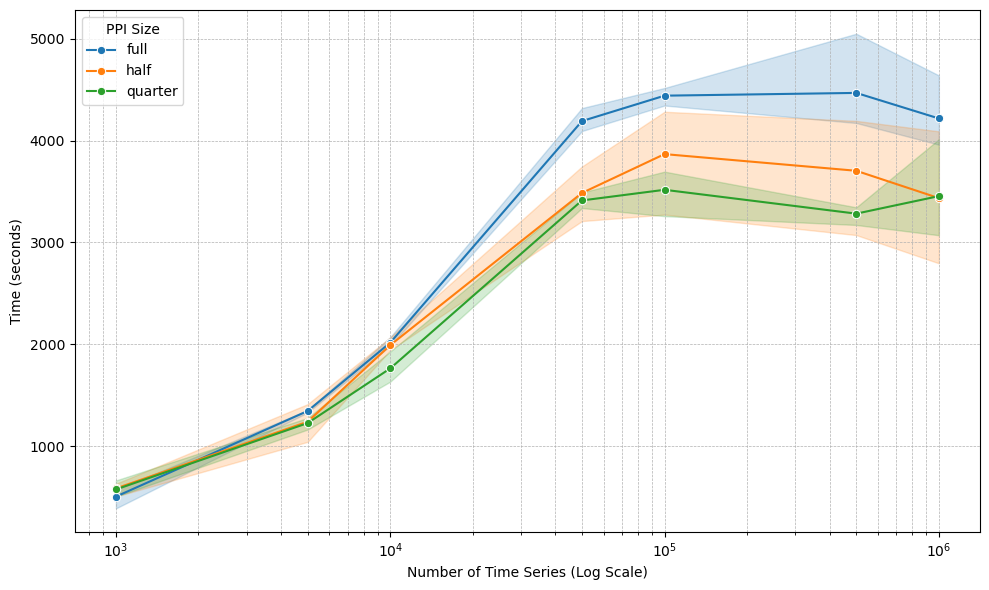

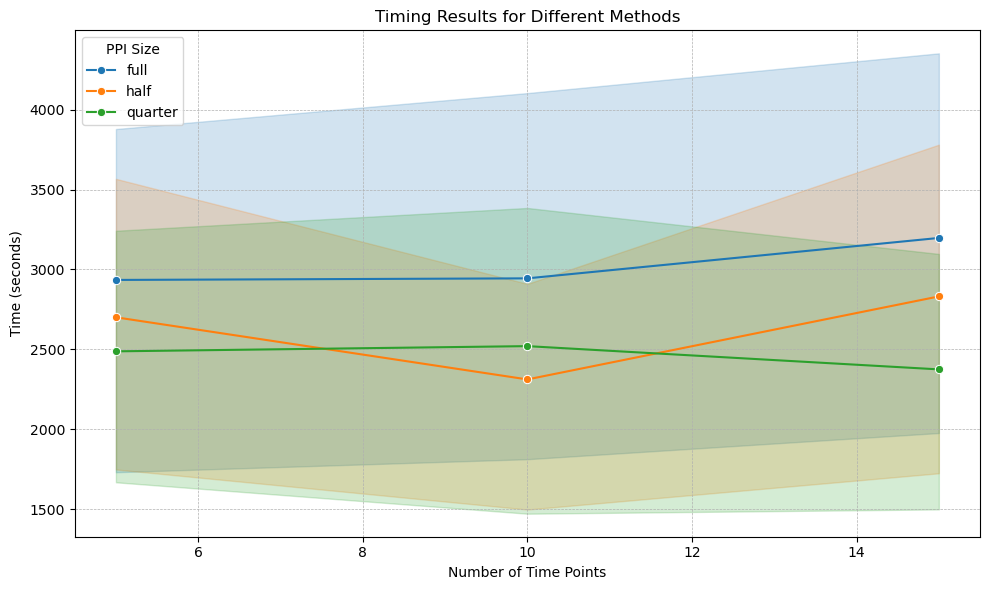

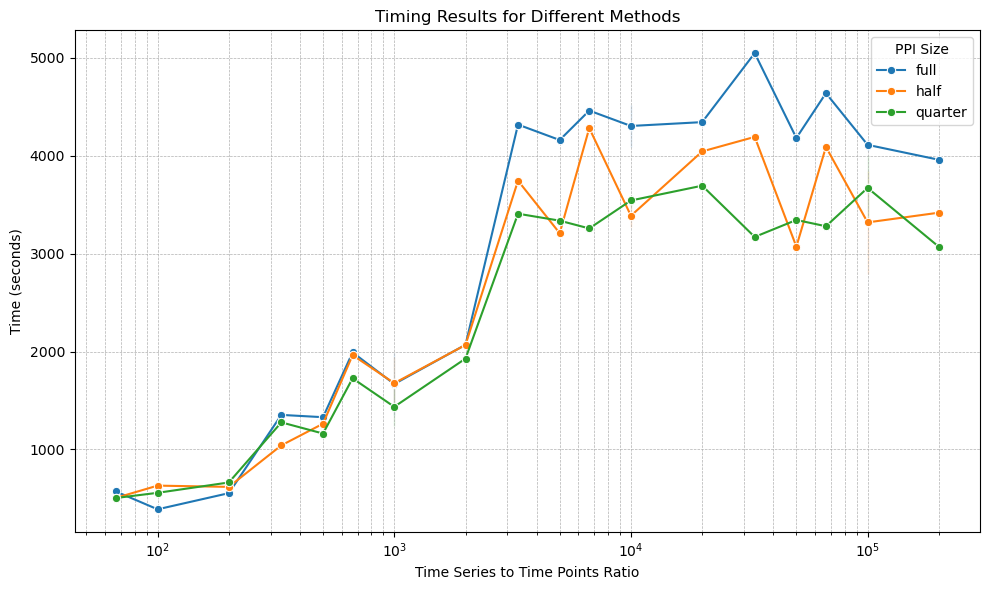

In [6]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=time_data, x="rows", y="runtime_sec", hue="ppi_type", marker="o", palette=palette_dict)
plt.xscale("log")
#plt.yscale("log")
plt.xlabel("Number of Time Series (Log Scale)")
plt.ylabel("Time (seconds)")
plt.legend(title="PPI Size")
plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.savefig("plot_rows_vs_runtime.pdf")

plt.figure(figsize=(10, 6))
sns.lineplot(data=time_data, x="cols", y="runtime_sec", hue="ppi_type", marker="o", palette=palette_dict)
#plt.xscale("log")
#plt.yscale("log")
plt.xlabel("Number of Time Points")
plt.ylabel("Time (seconds)")
plt.title("Timing Results for Different Methods")
plt.legend(title="PPI Size")
plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.savefig("plot_cols_vs_runtime.pdf")

plt.figure(figsize=(10, 6))
sns.lineplot(data=time_data, x="rows_cols_ratio", y="runtime_sec", hue="ppi_type", marker="o", palette=palette_dict)
plt.xscale("log")
#plt.yscale("log")
plt.xlabel("Time Series to Time Points Ratio")
plt.ylabel("Time (seconds)")
plt.title("Timing Results for Different Methods")
plt.legend(title="PPI Size")
plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.savefig("plot_rows_cols_ratio_vs_runtime.pdf")

plt.show()

In [7]:
time_perm = pd.read_csv("timing_results_permutations.csv")
time_perm

,dataset,ppi_type,perm,runtime_sec,timestamp
0,subdataset_half_1000rows_5cols,half,10,165.645871,2025-09-02 11:41:03
1,subdataset_half_1000rows_5cols,half,50,392.977481,2025-09-02 11:47:36
2,subdataset_half_1000rows_5cols,half,100,690.186546,2025-09-02 11:59:06
3,subdataset_half_1000rows_5cols,half,500,3120.238785,2025-09-02 12:51:07
4,subdataset_half_1000rows_5cols,half,1000,6151.151490,2025-09-02 14:33:38
5,subdataset_quarter_1000rows_5cols,quarter,10,174.948113,2025-09-02 14:36:33
6,subdataset_quarter_1000rows_5cols,quarter,50,398.628070,2025-09-02 14:43:11
7,subdataset_quarter_1000rows_5cols,quarter,100,731.572260,2025-09-02 14:55:23
8,subdataset_quarter_1000rows_5cols,quarter,500,3321.905110,2025-09-02 15:50:45
9,subdataset_quarter_1000rows_5cols,quarter,1000,6641.668065,2025-09-02 17:41:26


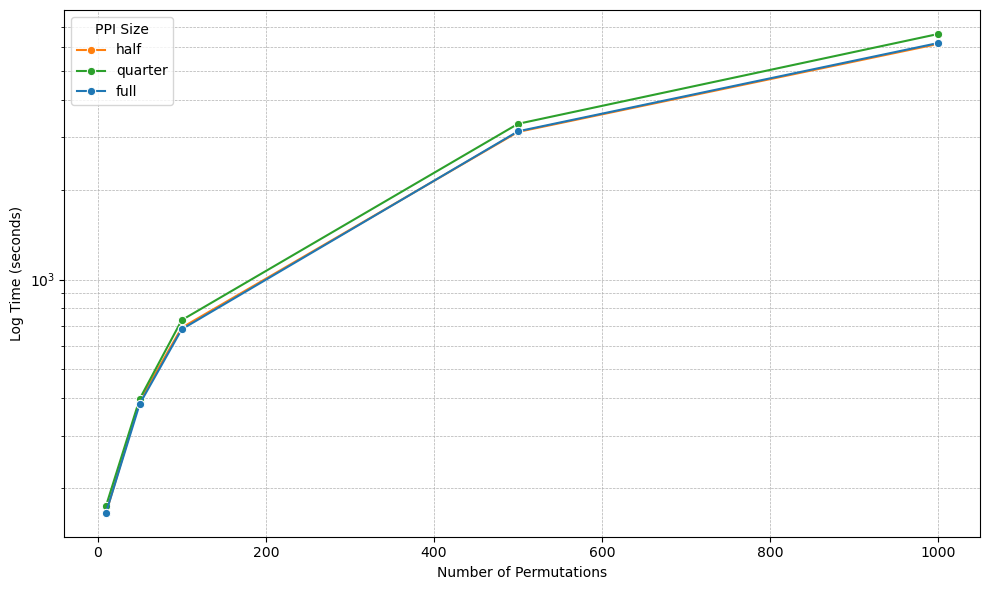

In [8]:



plt.figure(figsize=(10, 6))
sns.lineplot(data=time_perm, x="perm", y="runtime_sec", hue="ppi_type", marker="o", palette=palette_dict)
#plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of Permutations")
plt.ylabel("Log Time (seconds)")
plt.legend(title="PPI Size")
plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.savefig("plot_perms_vs_runtime.pdf")

plt.show()